<a href="https://colab.research.google.com/github/AsmaBenHmidene/Thyroid-disease-medical-diagnosis-prediction/blob/main/Clean_and_explore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Thyroid disease medical diagnosis prediction:

1. Source of data

Thyroid Data - https://archive.ics.uci.edu/ml/datasets/thyroid+disease ,
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data ,
https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data

2. Brief description of data

The datasets featured were created by reconciling thyroid disease datasets provided by the UCI Machine Learning Repository of patient background information and blood test results along with thyroid-related medical diagnosis

3. What is the target?

target - hyperthyroidism medical diagnosis (str).

    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of comments.

Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


4. What does one row represent? (A person? A business? An event? A product?)

a person

5. Is this a classification or regression problem?

classification problem.

6. How many features does the data have?

30 features.

7. How many rows are in the dataset?

9172 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

many missing values in multiple columns.

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)


# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [92]:
# Load data from file structure
filename2 = '/content/drive/MyDrive/Coding Dojo/Project 2/project 2 multi classification/thyroidDF.csv'
df = pd.read_csv(filename2)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


# cleaning:

drop no needed column:

In [93]:
df.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


1. duplicates:

In [94]:
df.duplicated().sum()

10

In [95]:
df = df.drop_duplicates()
df.duplicated().sum()

0

2. data types:

In [96]:
df.dtypes

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH                    float64
T3                     float64
TT4                    float64
T4U                    float64
FTI                    float64
TBG                    float64
target                  object
dtype: object

3. Impossible values in numeric columns:

In [97]:
df.select_dtypes('number').describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9162.000000,8328.000000,6566.000000,8728.000000,8361.000000,8368.000000,341.000000
mean,73.581205,5.219434,1.970650,108.704017,0.976067,113.643528,29.978446
std,1184.622352,24.186817,0.887711,37.525337,0.200377,41.553807,21.304559
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.070000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


Max age is impossible value.

In [98]:
num_columns= df.select_dtypes('number')
for column in num_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

age : [   29    41    36    32    60    77    28    54    42    51    37    16
    43    63    40    75    56    85    71    67    55    61    46    44
    82    64    70    33    59    53    52    49    35    48    27    69
    76    73    68    66    30    88    38    58    21    45    83    62
    25    86    72    14    15    39    26    20    80    90    23    18
    13    78    24    81    92    57    74     9    47    17    11    50
    34     8    79    31    65    84    12    10    19    22     1     2
    97     6    89    87   455    93     7    91     5    94     4 65511
    95 65512     3 65526]
TSH : [3.0000000e-01 1.6000000e+00           nan 7.0000000e-01 1.2000000e+00
 1.9000000e+00 1.0000000e+00 5.0000000e-01 2.6000000e+00 6.8000000e+01
 1.5000000e+00 5.9000000e+00 5.0000000e-02 4.0000000e+00 4.0000000e-01
 8.0000000e-01 2.0000000e-01 3.0000000e+00 9.5999990e+00 1.4000000e+02
 6.0000000e-01 1.7000000e+00 2.5000000e+00 6.8000000e+00 2.1000000e+00
 1.1000000e+00 9.799999

In [99]:
df['age'] = df['age'].replace(65511,11, regex=True).replace(65512,12, regex=True).replace(65526,26, regex=True).replace(455,45, regex=True)

<ipython-input-99-44969073ada0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df['age'].unique()

array([29, 41, 36, 32, 60, 77, 28, 54, 42, 51, 37, 16, 43, 63, 40, 75, 56,
       85, 71, 67, 55, 61, 46, 44, 82, 64, 70, 33, 59, 53, 52, 49, 35, 48,
       27, 69, 76, 73, 68, 66, 30, 88, 38, 58, 21, 45, 83, 62, 25, 86, 72,
       14, 15, 39, 26, 20, 80, 90, 23, 18, 13, 78, 24, 81, 92, 57, 74,  9,
       47, 17, 11, 50, 34,  8, 79, 31, 65, 84, 12, 10, 19, 22,  1,  2, 97,
        6, 89, 87, 93,  7, 91,  5, 94,  4, 95,  3])

4. inconsistent values in categorical columns:

In [101]:
object_columns= df.select_dtypes('object')
for column in object_columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")

sex : ['F' 'M' nan]
on_thyroxine : ['f' 't']
query_on_thyroxine : ['f' 't']
on_antithyroid_meds : ['f' 't']
sick : ['f' 't']
pregnant : ['f' 't']
thyroid_surgery : ['f' 't']
I131_treatment : ['f' 't']
query_hypothyroid : ['t' 'f']
query_hyperthyroid : ['f' 't']
lithium : ['f' 't']
goitre : ['f' 't']
tumor : ['f' 't']
hypopituitary : ['f' 't']
psych : ['f' 't']
target : ['-' 'S' 'F' 'AK' 'R' 'I' 'M' 'N' 'G' 'K' 'A' 'KJ' 'L' 'MK' 'Q' 'J' 'C|I'
 'O' 'LJ' 'H|K' 'D' 'GK' 'MI' 'P' 'FK' 'B' 'GI' 'C' 'GKJ' 'OI' 'D|R' 'E']


5. NaN values:

In [102]:
df.isna().sum()

age                       0
sex                     306
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     834
T3                     2596
TT4                     434
T4U                     801
FTI                     794
TBG                    8821
target                    0
dtype: int64

There are missing value in TSH , T3, TT4, T4U, FTI and TBG. All of them are numerical columns. For object columns, there is missing values in sex column.

We will use Exploratory Visualizations to determine the best imputation method for the numerical columns.

In [103]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  axes[0].legend();

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

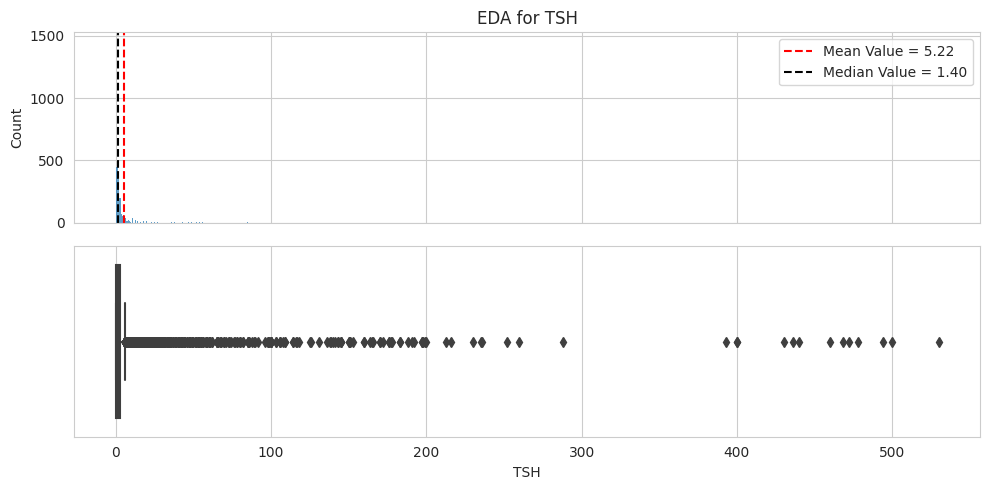

In [104]:
plot_numeric(df,"TSH")

The distribution is skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [105]:
df['TSH'].fillna(df['TSH'].median(), inplace = True)
df['TSH'].isna().sum()

0

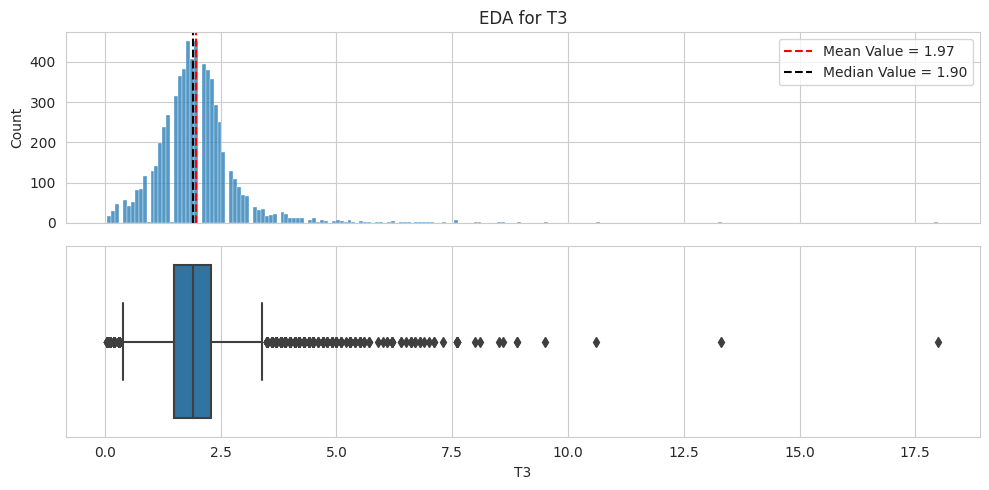

In [106]:
plot_numeric(df,"T3")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [107]:
df['T3'].fillna(df['T3'].mean(), inplace = True)
df['T3'].isna().sum()

0

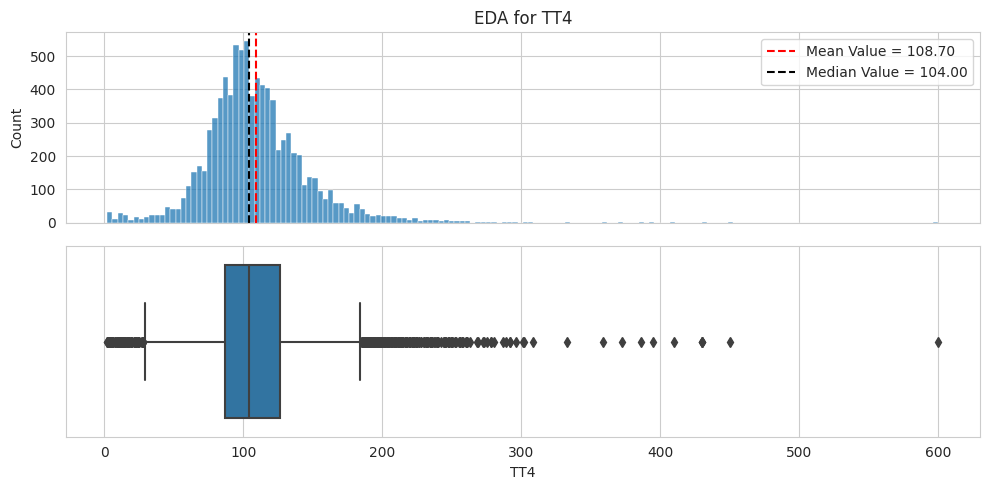

In [108]:
plot_numeric(df, "TT4")

The distribution is slightly skewed, therefore the missing value will be imputed with the median since the median will be less sensitive to outliers than the mean.

In [109]:
df['TT4'].fillna(df['TT4'].median(), inplace = True)
df['TT4'].isna().sum()

0

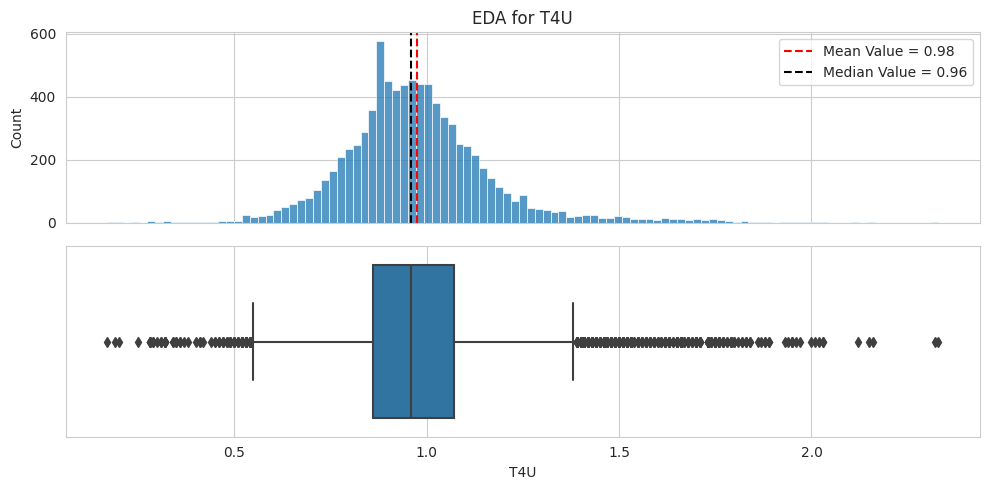

In [110]:
plot_numeric(df,"T4U")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [111]:
df['T4U'].fillna(df['T4U'].mean(), inplace = True)
df['T4U'].isna().sum()

0

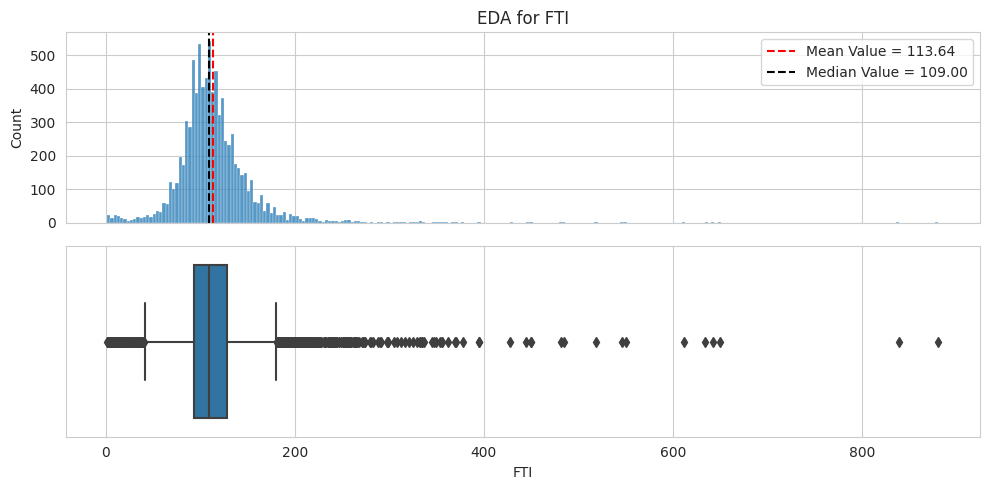

In [112]:
plot_numeric(df,"FTI")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [113]:
df['FTI'].fillna(df['FTI'].mean(), inplace = True)
df['FTI'].isna().sum()

0

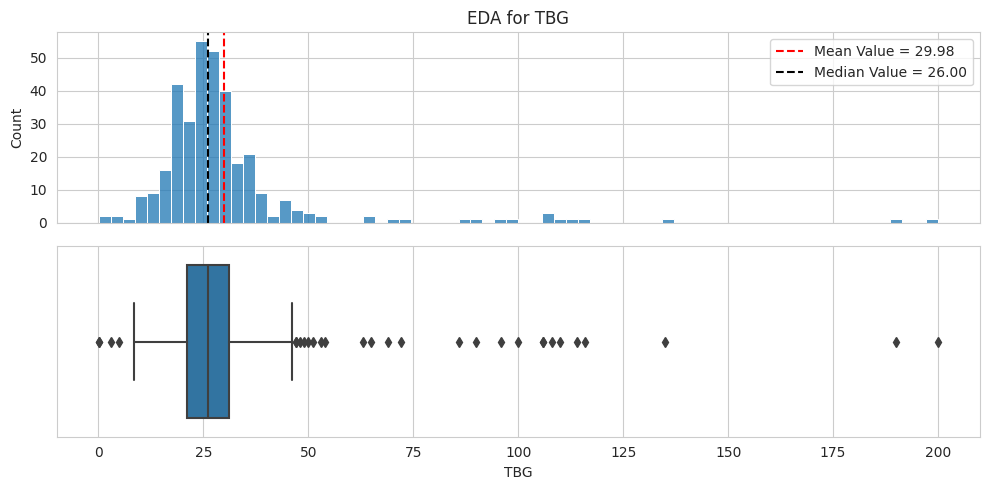

In [114]:
plot_numeric(df,"TBG")

The distribution is normal, therefore the missing value will be imputed with the mean.

In [115]:
df['TBG'].fillna(df['TBG'].mean(), inplace = True)
df['TBG'].isna().sum()

0

We will impute missing value in Sex column with the most frequent category.

In [116]:
df['sex'].value_counts()

F    6064
M    2792
Name: sex, dtype: int64

In [117]:
df['sex'].fillna('F', inplace = True)
df['sex'].isna().sum()

0

In [118]:
df.isna().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
target                 0
dtype: int64

6. Dataset balance:

In [119]:
df['target'].value_counts()

-      6763
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        83
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I      12
KJ       11
GI       10
H|K       8
D         8
FK        6
C         6
P         5
MI        2
LJ        1
GKJ       1
OI        1
D|R       1
E         1
Name: target, dtype: int64

# Exploratory Visuals:

Produced univariate visuals for the target and all features

1. Categorical columns:

In [120]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

F    6370
M    2792
Name: sex, dtype: int64
f    7923
t    1239
Name: on_thyroxine, dtype: int64
f    9009
t     153
Name: query_on_thyroxine, dtype: int64
f    9046
t     116
Name: on_antithyroid_meds, dtype: int64
f    8818
t     344
Name: sick, dtype: int64
f    9055
t     107
Name: pregnant, dtype: int64
f    9028
t     134
Name: thyroid_surgery, dtype: int64
f    8993
t     169
Name: I131_treatment, dtype: int64
f    8533
t     629
Name: query_hypothyroid, dtype: int64
f    8512
t     650
Name: query_hyperthyroid, dtype: int64
f    9069
t      93
Name: lithium, dtype: int64
f    9078
t      84
Name: goitre, dtype: int64
f    8921
t     241
Name: tumor, dtype: int64
f    9160
t       2
Name: hypopituitary, dtype: int64
f    8744
t     418
Name: psych, dtype: int64
-      6763
K       436
G       359
I       346
F       233
R       196
A       147
L       115
M       111
N       110
S        83
GK       49
AK       46
J        30
B        21
MK       16
Q        14
O        14
C|I  

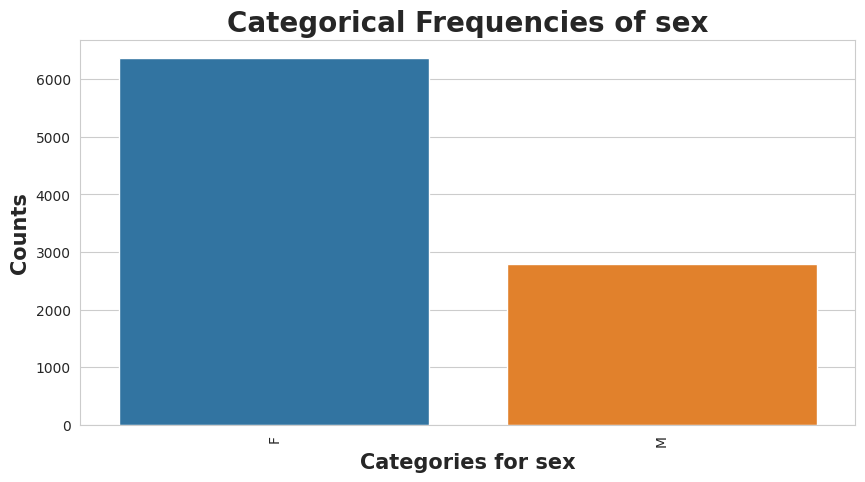

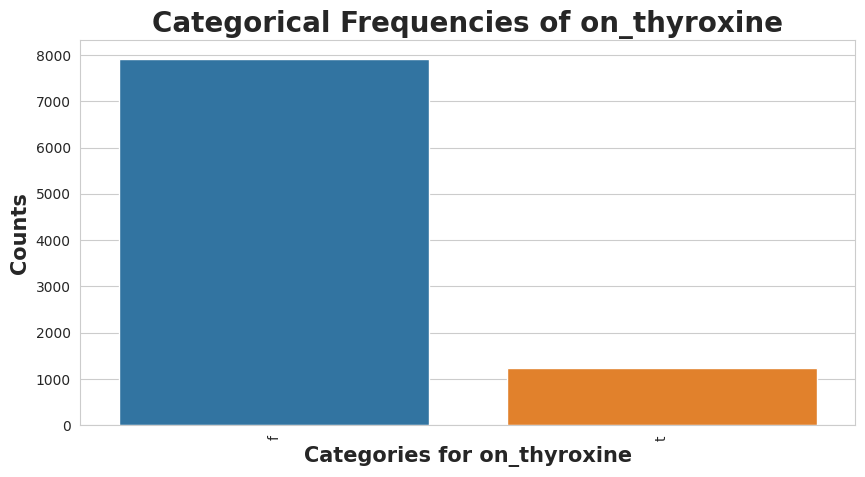

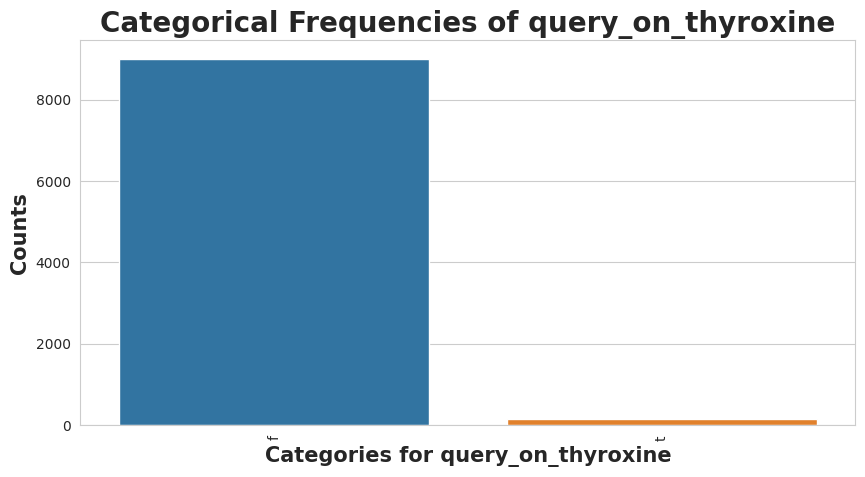

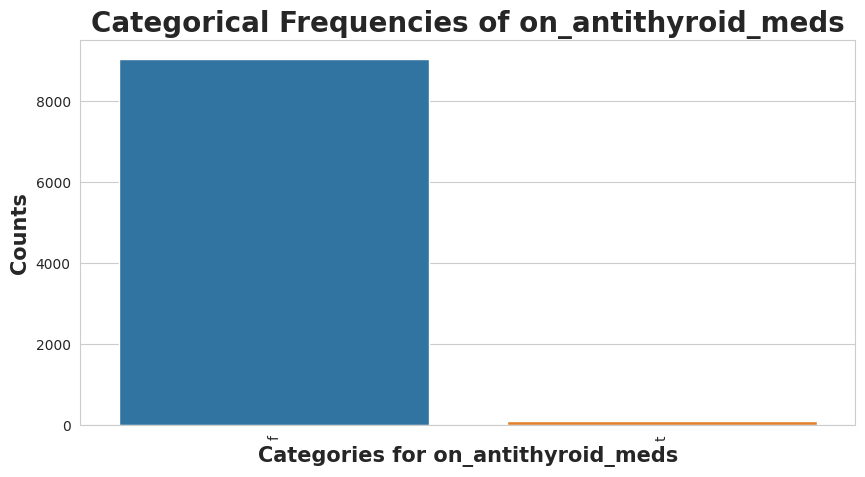

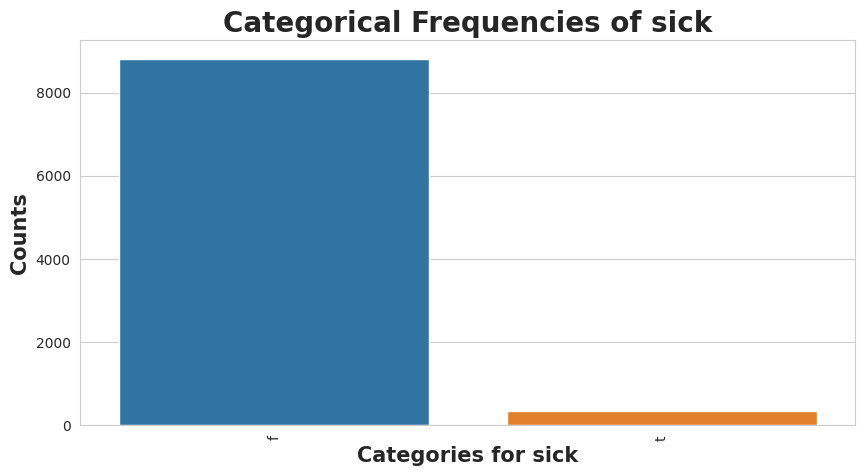

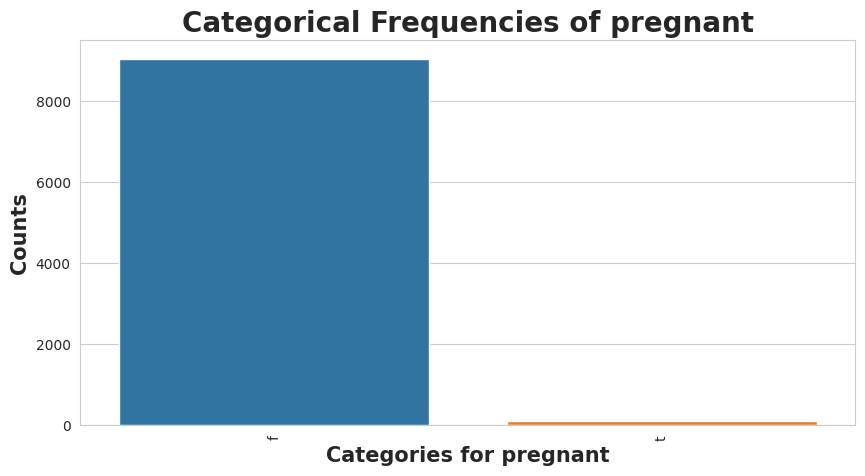

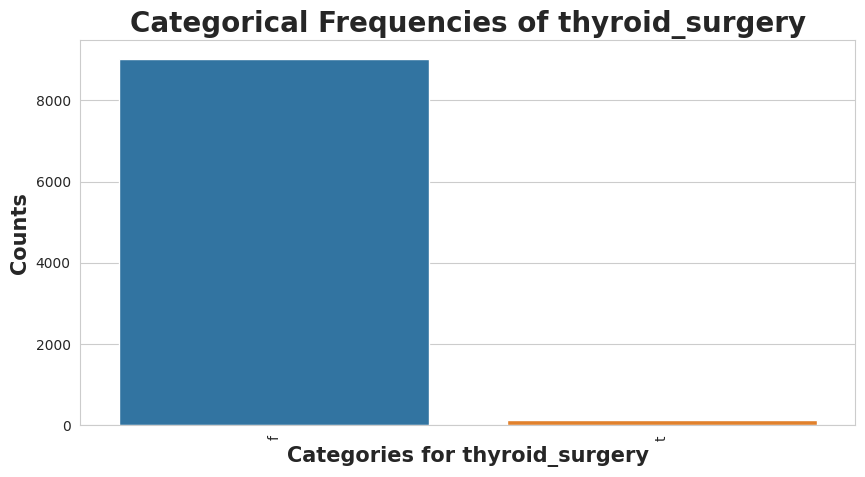

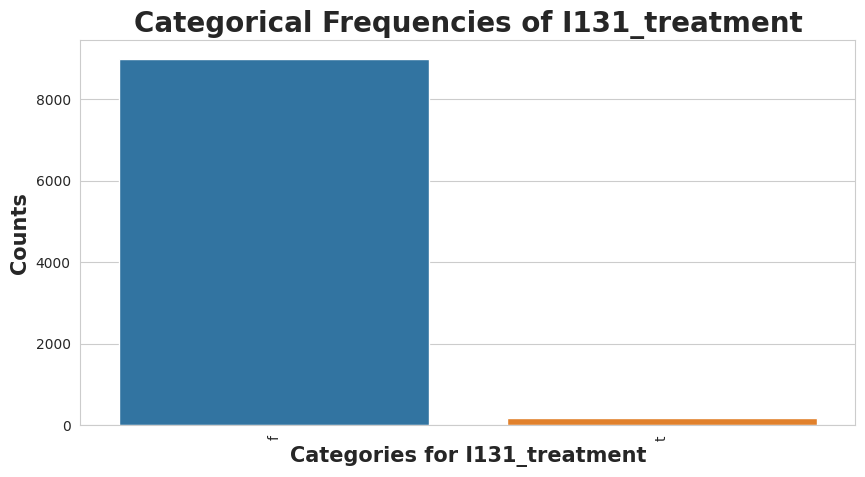

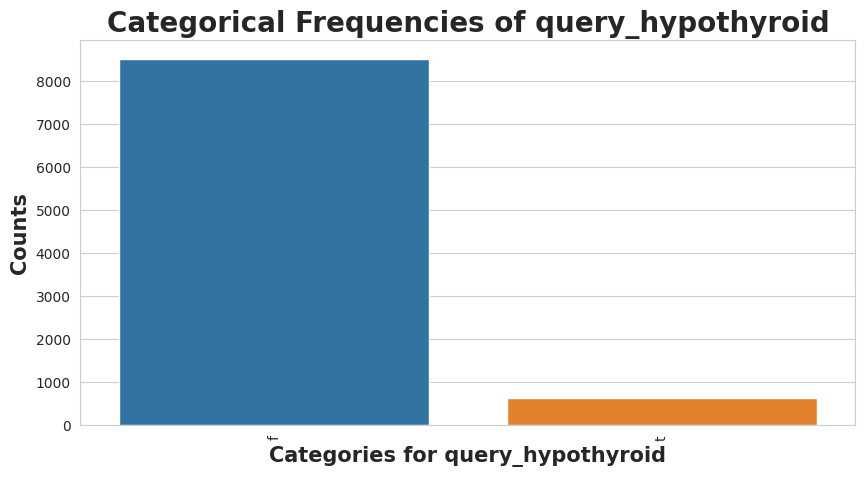

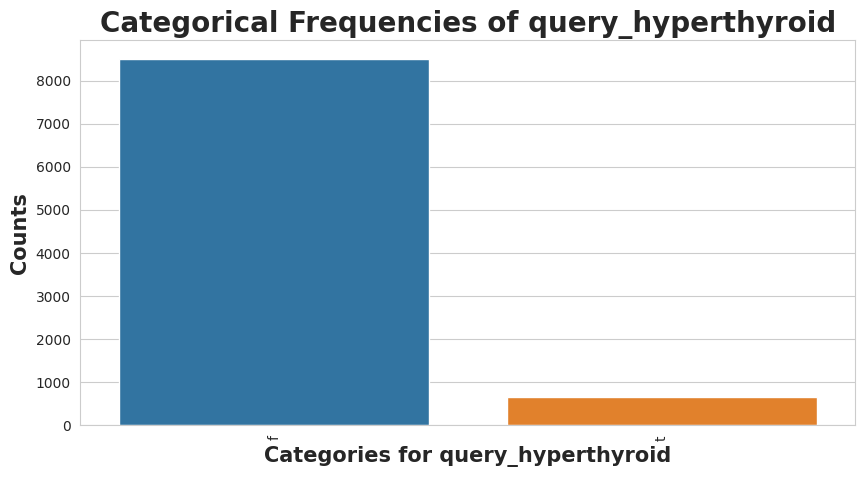

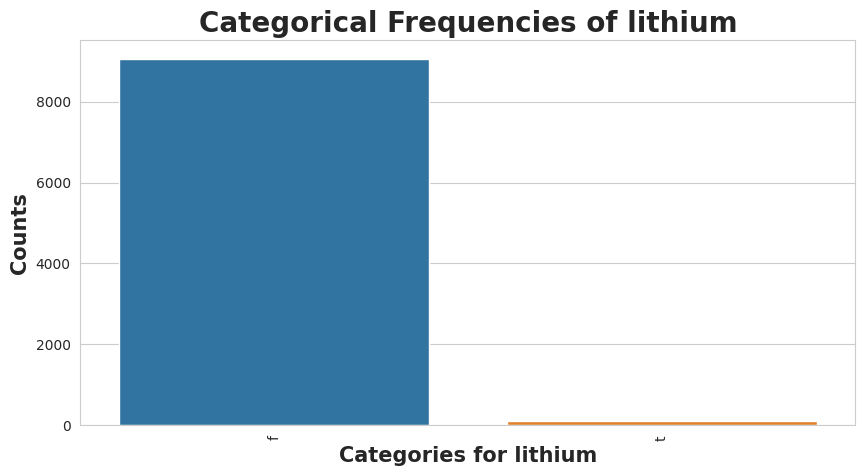

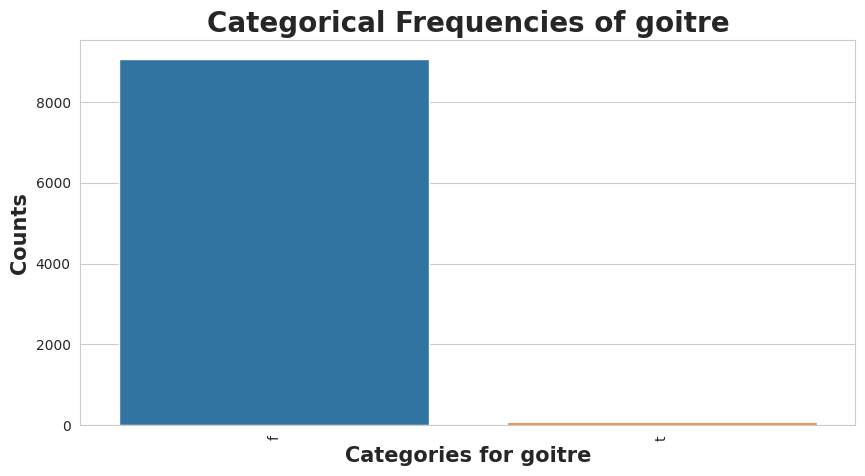

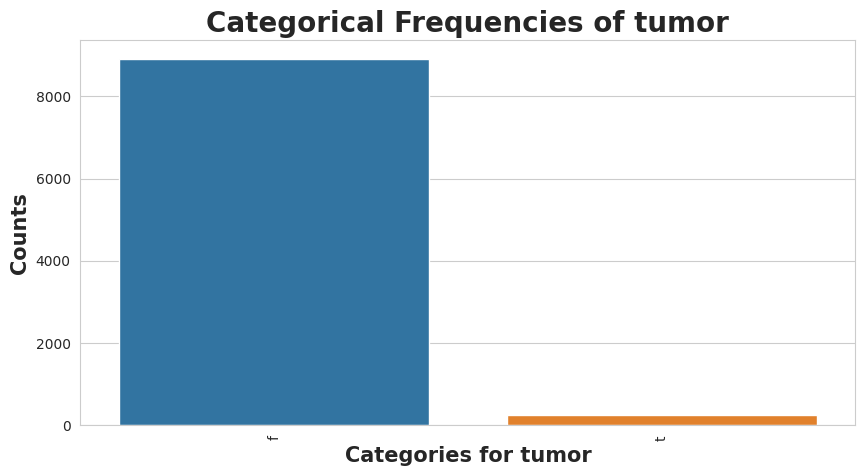

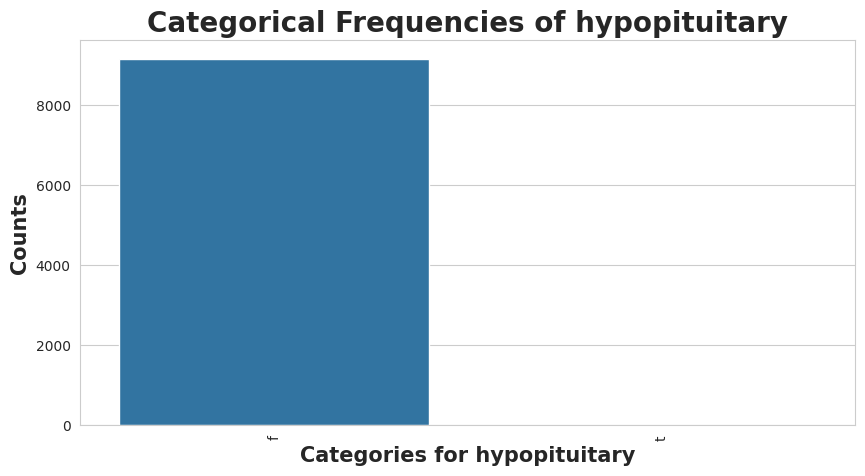

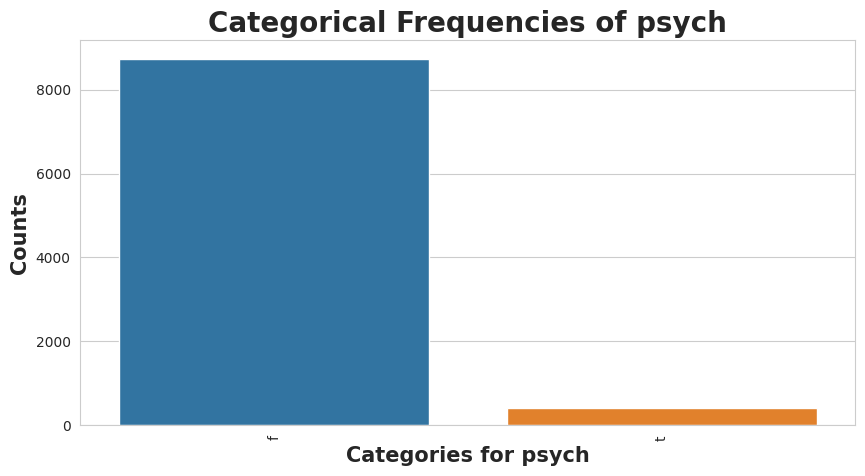

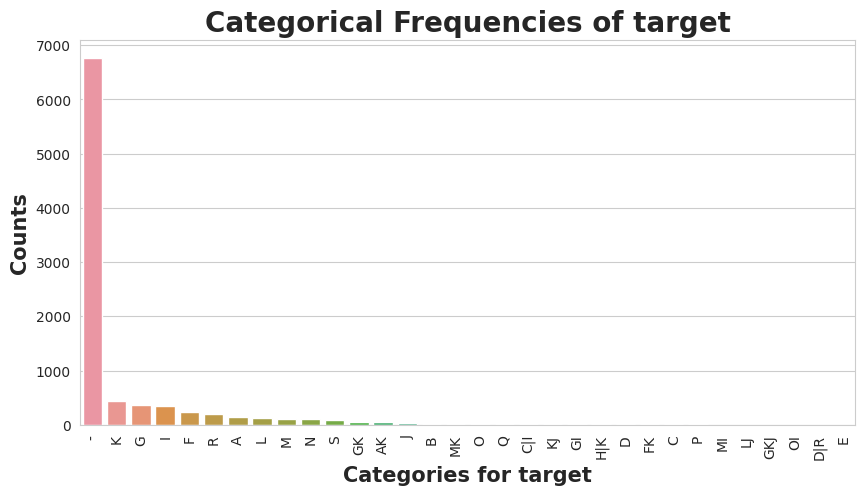

In [121]:
object_columns= df.select_dtypes('object')
for column in object_columns:
    print('==============================')
    fig, ax = plot_bar(df, column, column);
    print(df[column].value_counts())

2. numerical columns:

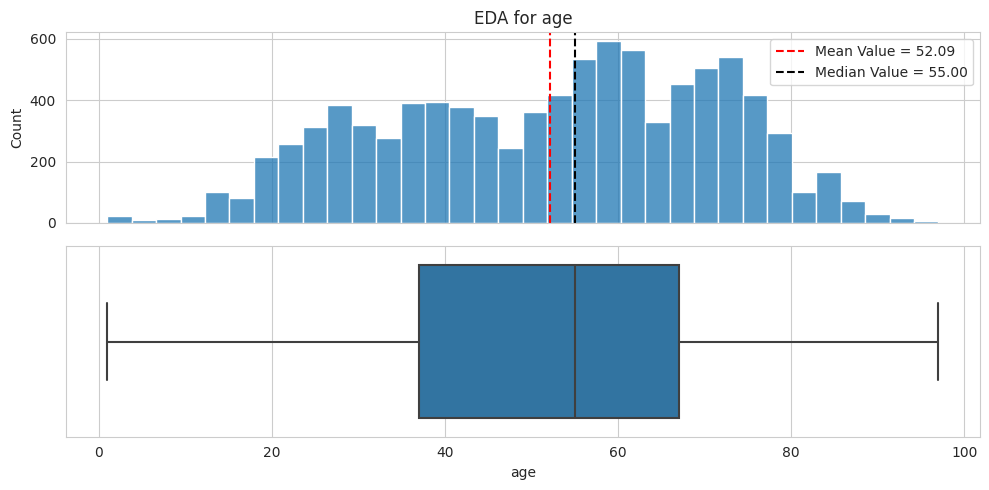

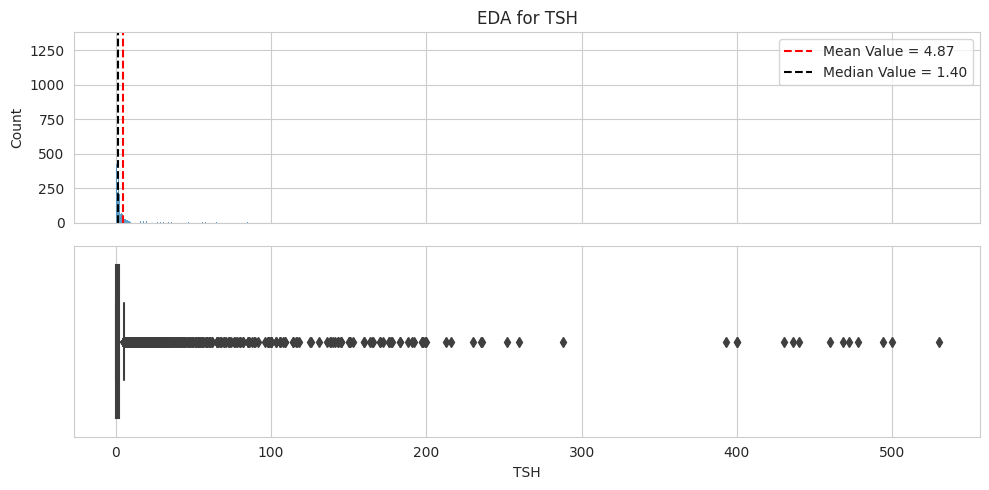

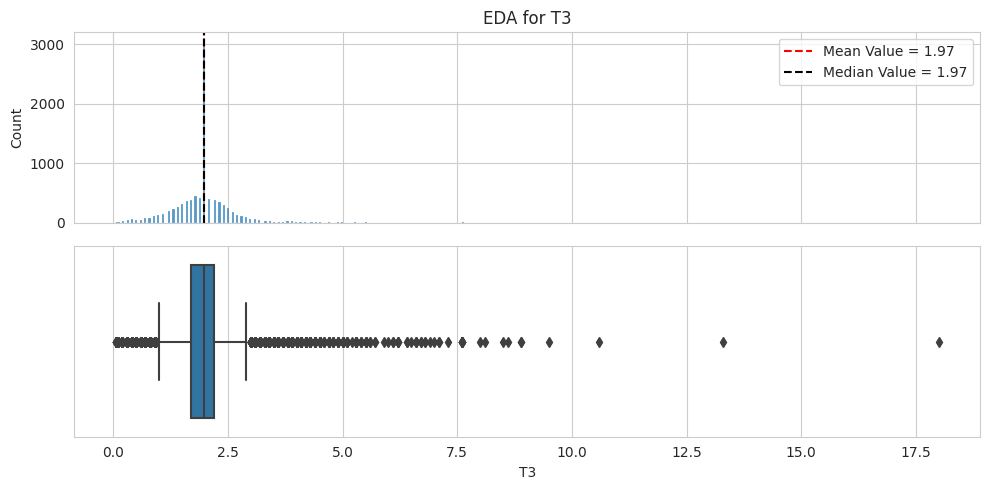

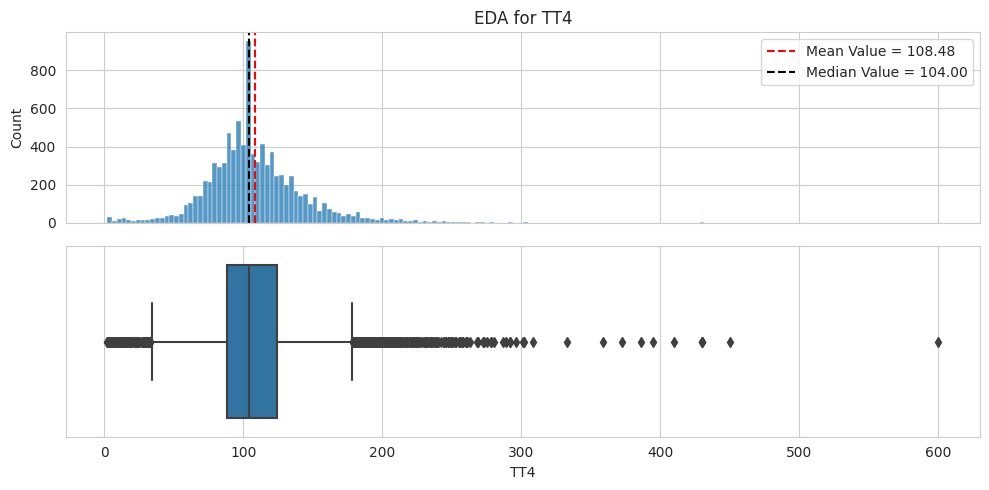

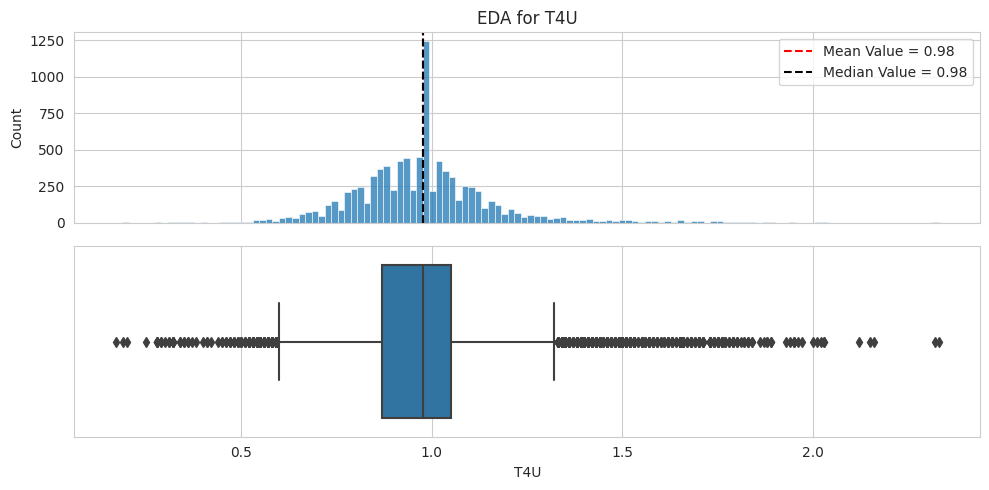

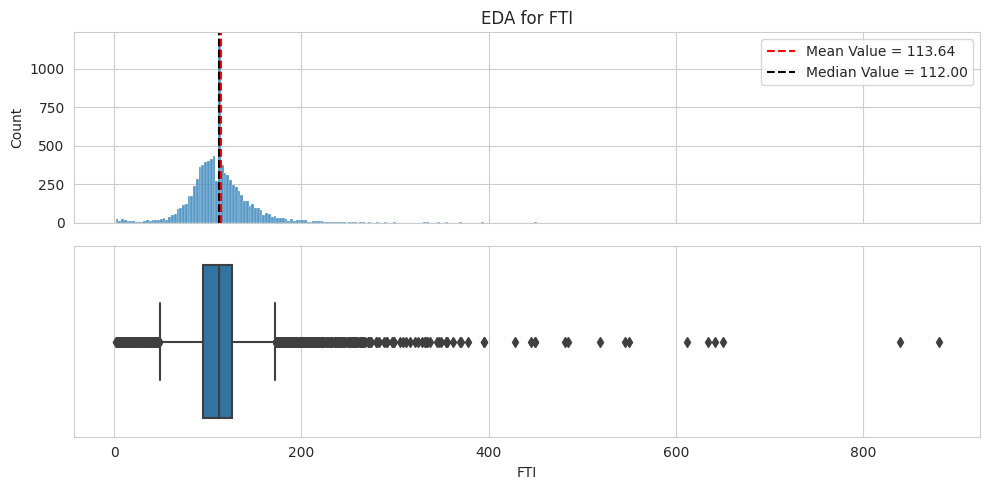

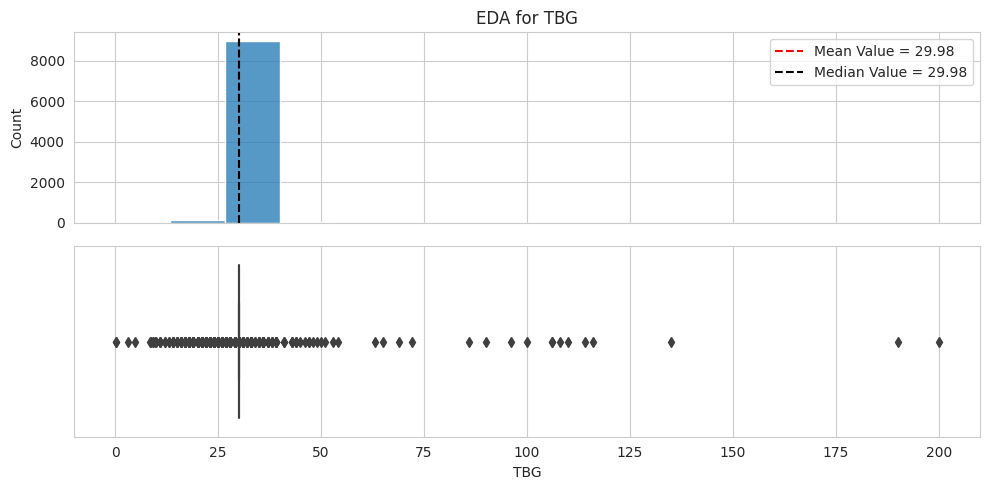

In [122]:
num_columns= df.select_dtypes('number')
for columns in num_columns:
    plot_numeric(df,columns);

# Analyses of features:

## percentage of Sick and Healthy people:

In [123]:
df['sick'].value_counts()

f    8818
t     344
Name: sick, dtype: int64

In [124]:
df['sick'] = df['sick'].replace({'f': 'Healthy', 't': 'Sick'})

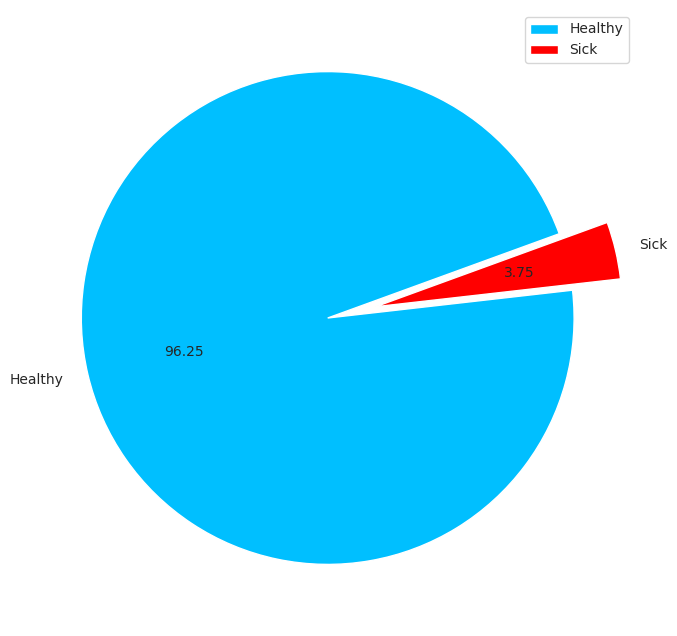

In [125]:
plt.figure(figsize=(8,8))
plt.pie(x=df.sick.value_counts(),
        labels=['Healthy','Sick'],
        startangle = 20,
        colors=['deepskyblue','red'],
        autopct='%.2f',
        explode=[0,0.2]
       );
plt.legend();

## Distribution of patient with thyroid problem Based on Age

In [126]:
sick_df = df[df.sick=='Sick']

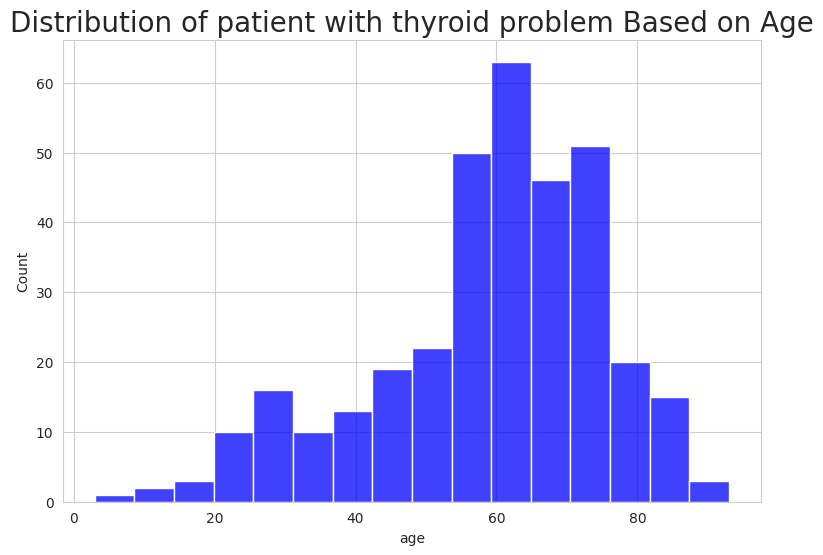

In [127]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=sick_df,color='blue')
plt.title("Distribution of patient with thyroid problem Based on Age",{'fontsize':20});

## percentage of male and female with thyroid problem:

In [128]:
sick_df['sex'].value_counts()

F    232
M    112
Name: sex, dtype: int64

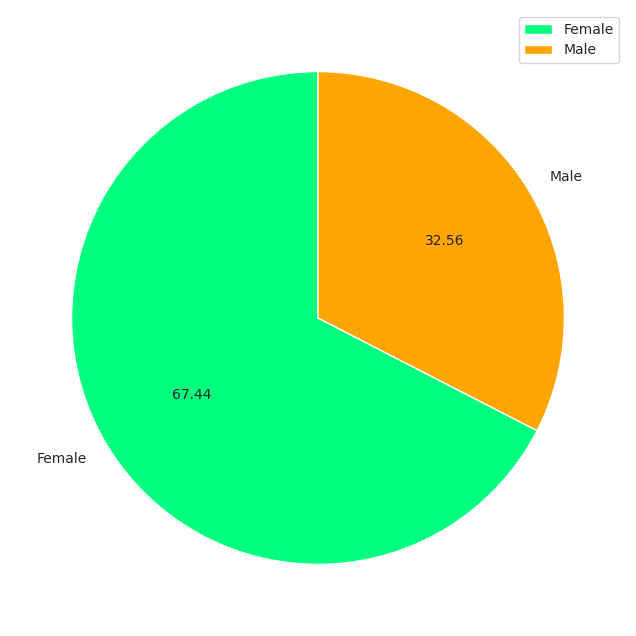

In [129]:
plt.figure(figsize=(10,8))
plt.pie(x=sick_df.sex.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

## pregnancy and thyroid disease:

In [130]:
df['pregnant'].value_counts()

f    9055
t     107
Name: pregnant, dtype: int64

In [131]:
woman_df = df[df.sex=='F']

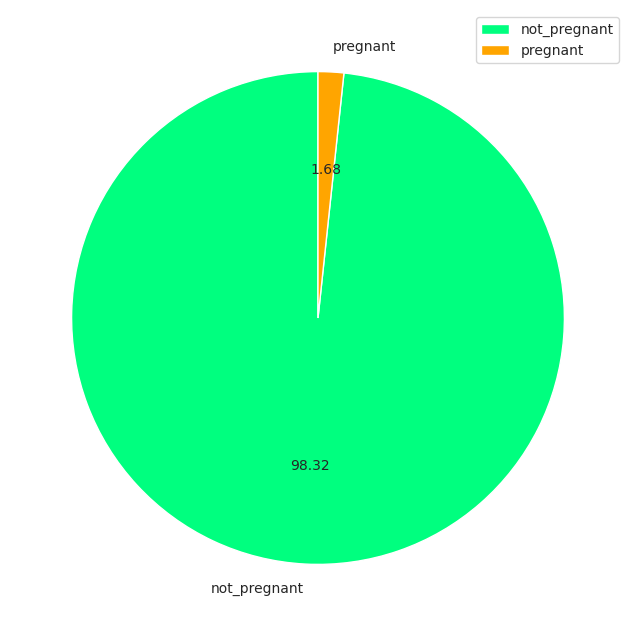

In [132]:
plt.figure(figsize=(10,8))
plt.pie(x=woman_df.pregnant.value_counts(),
        labels=['not_pregnant','pregnant'],
        startangle = 90,
        colors=['springgreen','orange'],
        autopct='%.2f'
       );
plt.legend();

In [133]:
# Encode 'pregnant' column
woman_df['pregnant'] = woman_df['pregnant'].replace({'f': 0, 't': 1});

<ipython-input-133-301bcde698d8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



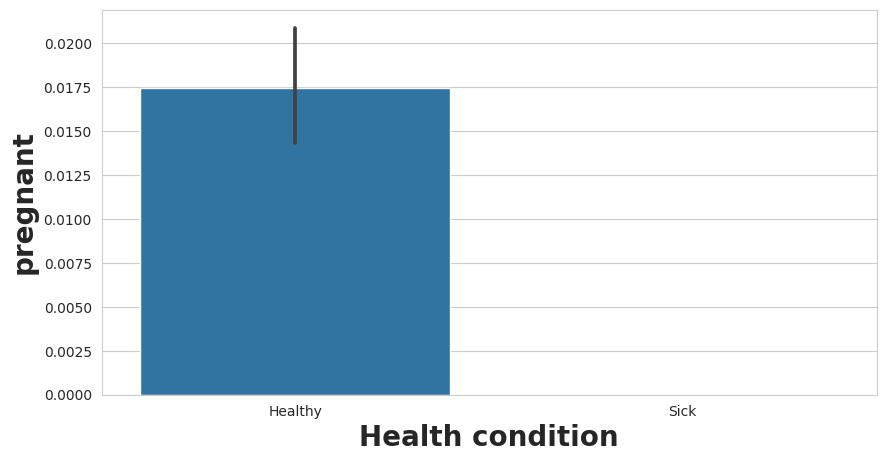

In [134]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=woman_df, y='pregnant', x="sick");
ax.set_title
ax.set_ylabel('pregnant',fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Health condition',fontsize = 20, fontweight = 'bold');

## countplot of used treatments:

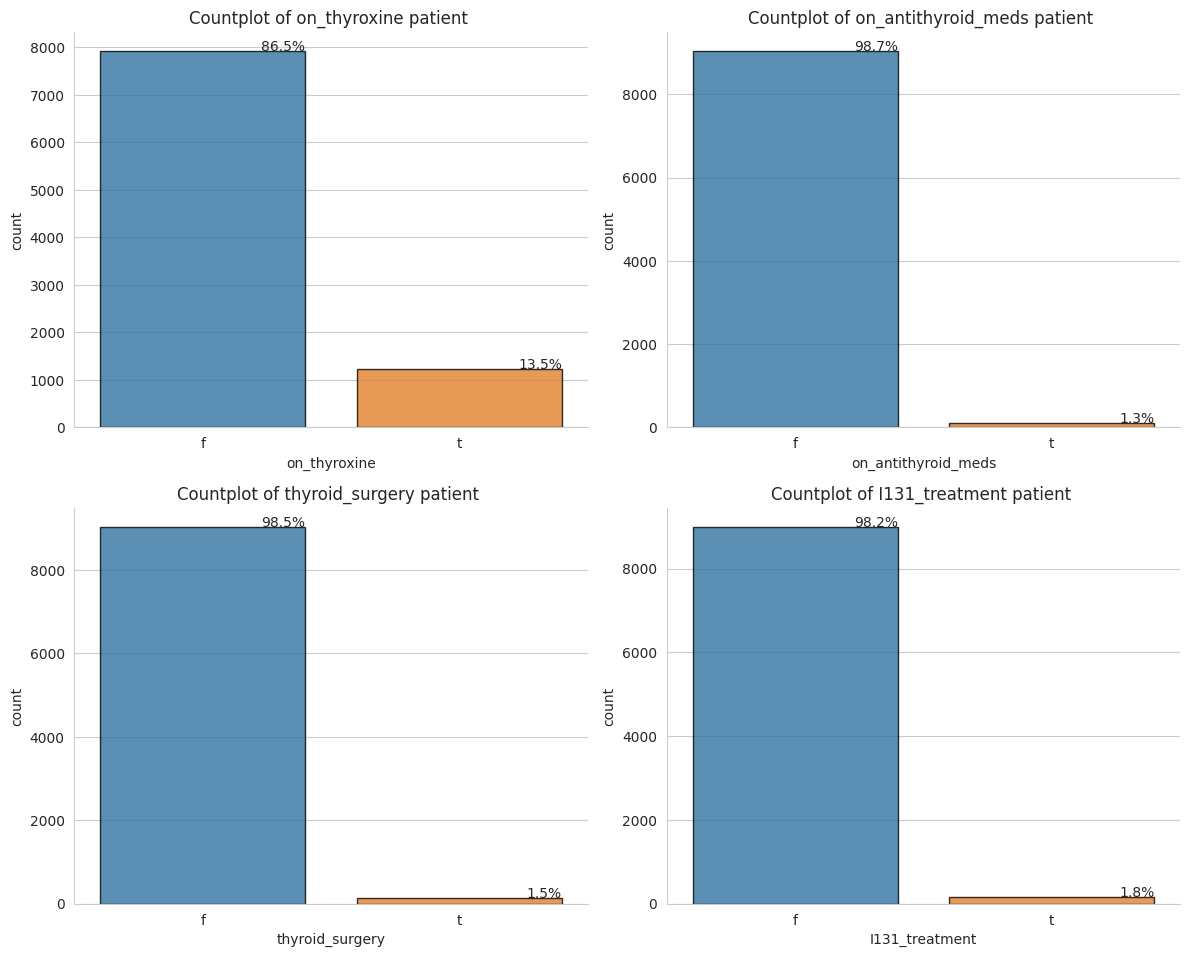

In [135]:
features = ['on_thyroxine', 'on_antithyroid_meds', 'thyroid_surgery', 'I131_treatment']
n = 1

plt.figure(figsize=[12, 14])

total = float(len(df))

for f in features:
    plt.subplot(3, 2, n)
    ax = sns.countplot(x=f, edgecolor='black', alpha=0.8, data=df)
    sns.despine()
    plt.title("Countplot of {} patient ".format(f))
    n=n+1
    plt.tight_layout()

    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')
plt.show()

## countplot of patient medical record related to thyroid:

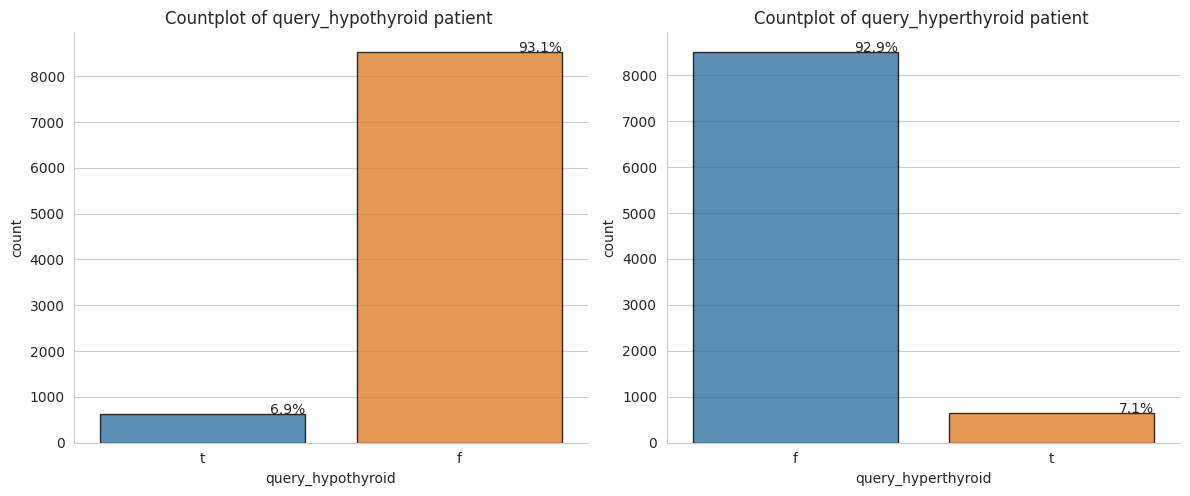

In [136]:
features = ['query_hypothyroid', 'query_hyperthyroid']
n = 1

plt.figure(figsize=[12, 14])

total = float(len(df))

for f in features:
    plt.subplot(3, 2, n)
    ax = sns.countplot(x=f, edgecolor='black', alpha=0.8, data=df)
    sns.despine()
    plt.title("Countplot of {} patient ".format(f))
    n=n+1
    plt.tight_layout()

    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')
plt.show()

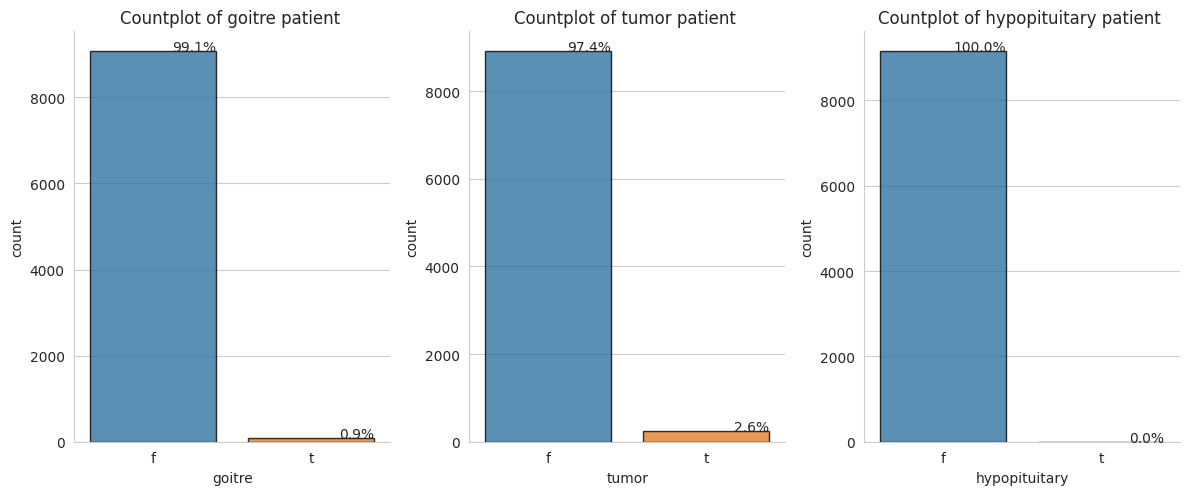

In [137]:
features = ['goitre', 'tumor', 'hypopituitary']
n = 1

plt.figure(figsize=[12, 14])

total = float(len(df))

for f in features:
    plt.subplot(3, 3, n)
    ax = sns.countplot(x=f, edgecolor='black', alpha=0.8, data=df)
    sns.despine()
    plt.title("Countplot of {} patient ".format(f))
    n=n+1
    plt.tight_layout()

    for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='right')
plt.show()

## Frequencies of thyroidism medical diagnosis:

In [138]:
def plot_bar1(data,x, y, figsize=(10,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    price_filter = df.loc[:, x] != '-'


    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df.loc[price_filter, x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of the medical diagnosis', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for thyroidism medical diagnosis', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Categorical Frequencies of the medical diagnosis'}, xlabel='Categories for thyroidism medical diagnosis', ylabel='Counts'>)

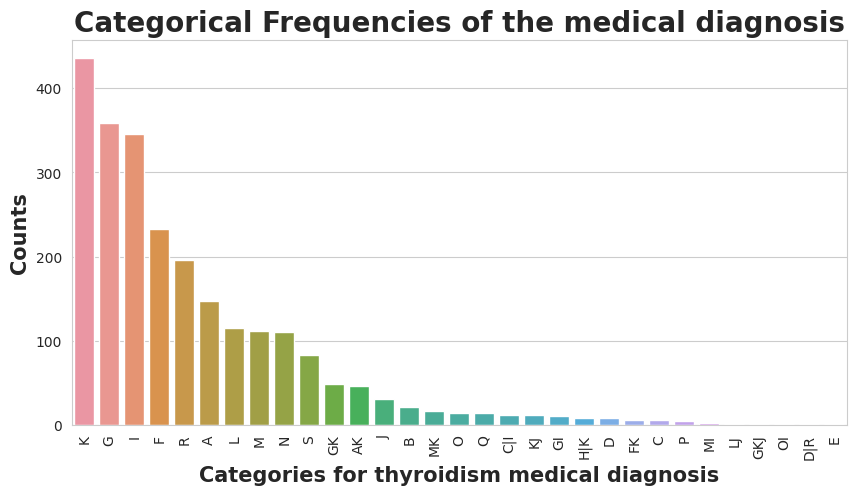

In [139]:
plot_bar1(df,'target','target')

## boxplot of medical diagnosis according to age and sex:

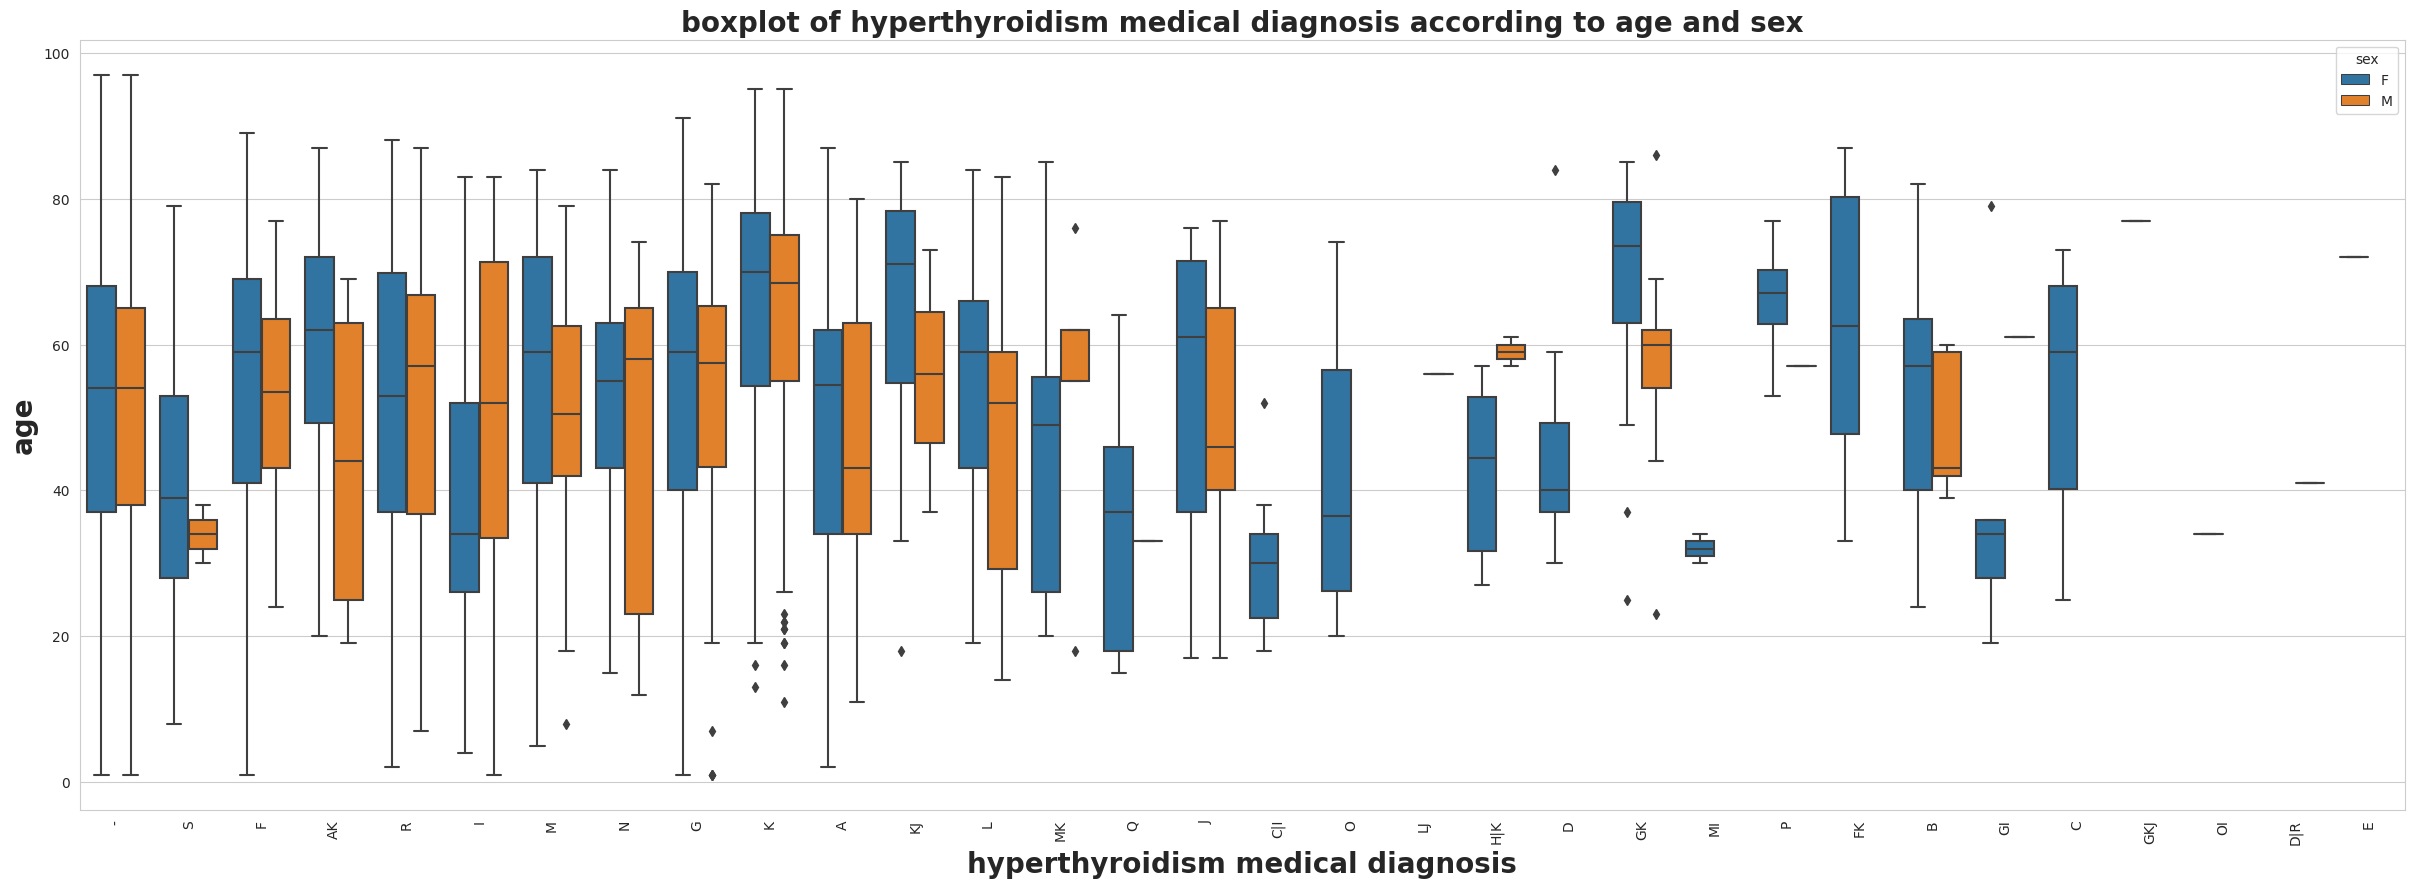

In [140]:
fig, ax = plt.subplots(figsize=(30,10))
sns.boxplot(data=df, x='target', y="age", hue='sex');
ax.set_title (f'boxplot of hyperthyroidism medical diagnosis according to age and sex', fontsize = 20, fontweight = 'bold')
ax.set_ylabel('age',fontsize = 20, fontweight = 'bold')
ax.set_xlabel('hyperthyroidism medical diagnosis',fontsize = 20, fontweight = 'bold')
plt.xticks(rotation = 90);

## Clustering target culomn into 3 groups and analyse the features:

In [141]:
df['target'].groupby(df['sex']).value_counts()

sex  target
F    -         4537
     I          316
     G          279
     K          258
     F          181
     R          118
     A          114
     N           97
     L           93
     M           85
     S           81
     AK          42
     GK          36
     B           16
     J           15
     O           14
     Q           13
     C|I         12
     MK          11
     GI           9
     D            8
     KJ           8
     C            6
     FK           6
     H|K          6
     P            4
     MI           2
     E            1
     GKJ          1
     OI           1
M    -         2226
     K          178
     G           80
     R           78
     F           52
     A           33
     I           30
     M           26
     L           22
     J           15
     GK          13
     N           13
     B            5
     MK           5
     AK           4
     KJ           3
     H|K          2
     S            2
     D|R          1
     GI 

Moving forward with the analysis it has been decided to only keep the observations for patients with diagnosis either negative, hyperthyroid, or hypothyroid. This is because they are the most prevalent observations and the focus of this project. The other classes were dropped from the dataset upon import and thus we are left with ~7500 unique entries in the dataset.

The main reason for dropping the other classes is that they are not important to our focus because either they dont relate thyroid disease per-se (for example non-thyroidal, discordant results), or they refer to a treatment (for example undergoing replacement therapy).
Another big, probably more important, reason is that they create niose in our data.
Our most important attributes are the blood test results of hormone levels. The other target classes referring to treatments and other conditions blurr barriers between classes. We believe they belong in a different analysis with a slightly different focus.

Letter  Diagnosis
    ------  ---------

    hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic

    hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

    binding protein:

    I   increased binding protein
    J   decreased binding protein

    general health:

    K   concurrent non-thyroidal illness

    replacement therapy:

    L   consistent with replacement therapy
    M   underreplaced
    N   overreplaced

    antithyroid treatment:

    O   antithyroid drugs
    P   I131 treatment
    Q   surgery

    miscellaneous:

    R   discordant assay results
    S   elevated TBG
    T   elevated thyroid hormones


In [142]:
mapping = {'-':"Negative",
           'A':'Hyperthyroid','AK':"Hyperthyroid",'B':"Hyperthyroid", 'C':"Hyperthyroid", 'C|I': 'Hyperthyroid', 'D':"Hyperthyroid", 'D|R':"Hyperthyroid",
           'E': "Hypothyroid", 'F': "Hypothyroid", 'FK': "Hypothyroid", "G": "Hypothyroid", "GK": "Hypothyroid", "GI": "Hypothyroid", 'GKJ': 'Hypothyroid', 'H|K': 'Hypothyroid',
          }
df['target'] = df['target'].map(mapping)

In [143]:
df['target'].unique()

array(['Negative', nan, 'Hypothyroid', 'Hyperthyroid'], dtype=object)

In [144]:
df['target'].isna().sum()

1491

In [145]:
df.dropna(subset=['target'], inplace=True)

In [146]:
target_dist = pd.DataFrame(df['target'].value_counts())
target_dist

,target
Negative,6763
Hypothyroid,667
Hyperthyroid,241


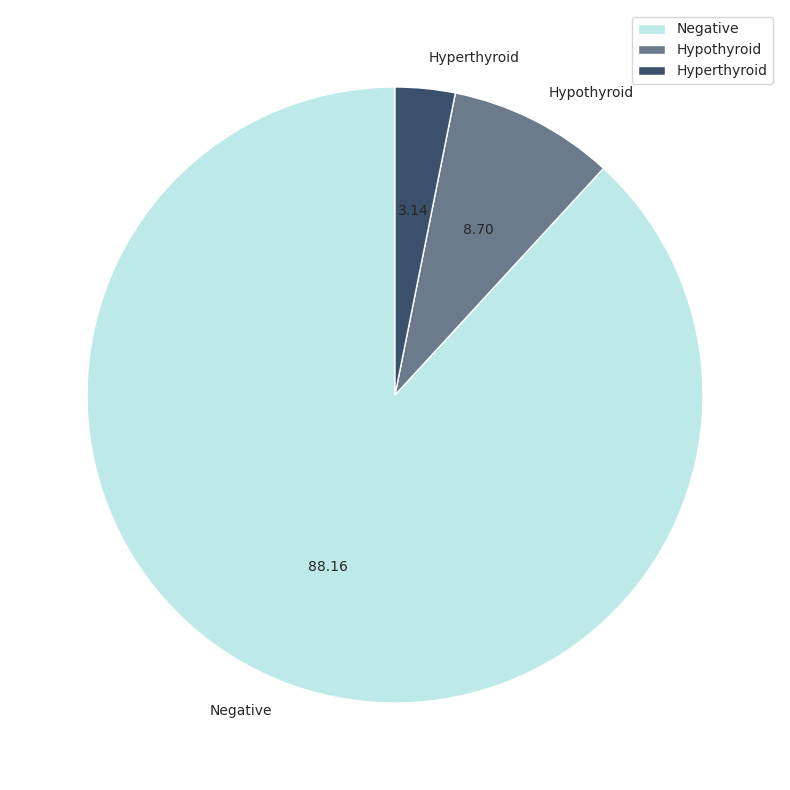

In [147]:
plt.figure(figsize=(10,10))
plt.pie(x=target_dist['target'],
        labels=['Negative','Hypothyroid','Hyperthyroid'],
        startangle = 90,
        colors=["#BEE9E9","#6C7B8B", "#3A506B"],
        autopct='%.2f'
       );
plt.legend();

### Countplot of the target according to gender:

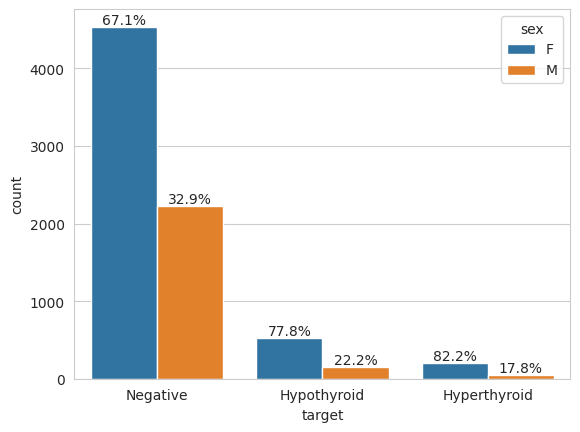

In [148]:
feat = 'target'
hue = 'sex'
hue_type = df[hue].dtype.type

groups = df[feat].unique()
proportions = df.groupby(feat)[hue].value_counts(normalize=True)


ax = sns.countplot(x=feat, hue=hue, data=df)

for c in ax.containers:
    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]

    ax.bar_label(c, labels)

### Effect of Lithium:

In [149]:
df['lithium'].value_counts()

f    7585
t      86
Name: lithium, dtype: int64

In [150]:
df.groupby('target')['lithium'].value_counts(normalize=True)

target        lithium
Hyperthyroid  f          1.000000
Hypothyroid   f          0.991004
              t          0.008996
Negative      f          0.988171
              t          0.011829
Name: lithium, dtype: float64

Text(0.5, 1.0, 'Countplot for lithium effect')

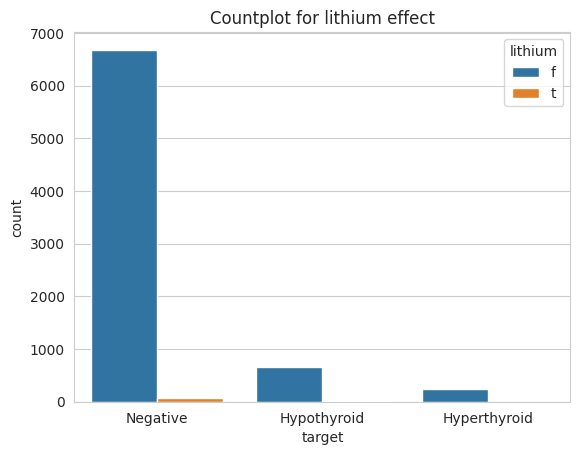

In [151]:
sns.countplot(x='target',hue='lithium',data=df)
plt.title("Countplot for lithium effect")

### psychiatric treatment:

In [152]:
df['psych'].value_counts()

f    7290
t     381
Name: psych, dtype: int64

In [153]:
df.groupby('target')['psych'].value_counts(normalize=True)

target        psych
Hyperthyroid  f        1.000000
Hypothyroid   f        0.982009
              t        0.017991
Negative      f        0.945438
              t        0.054562
Name: psych, dtype: float64

Text(0.5, 1.0, 'Countplot for psychiatric treatment')

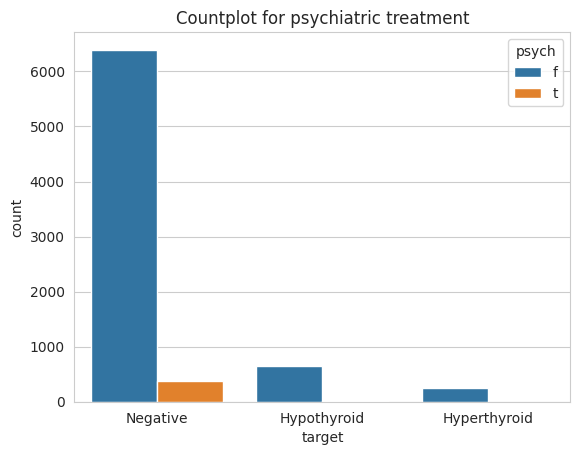

In [154]:
sns.countplot(x='target',hue='psych',data=df)
plt.title("Countplot for psychiatric treatment")

### Setting up grid for multiple seaborn plots: blood test results:

<Axes: xlabel='target', ylabel='TBG'>

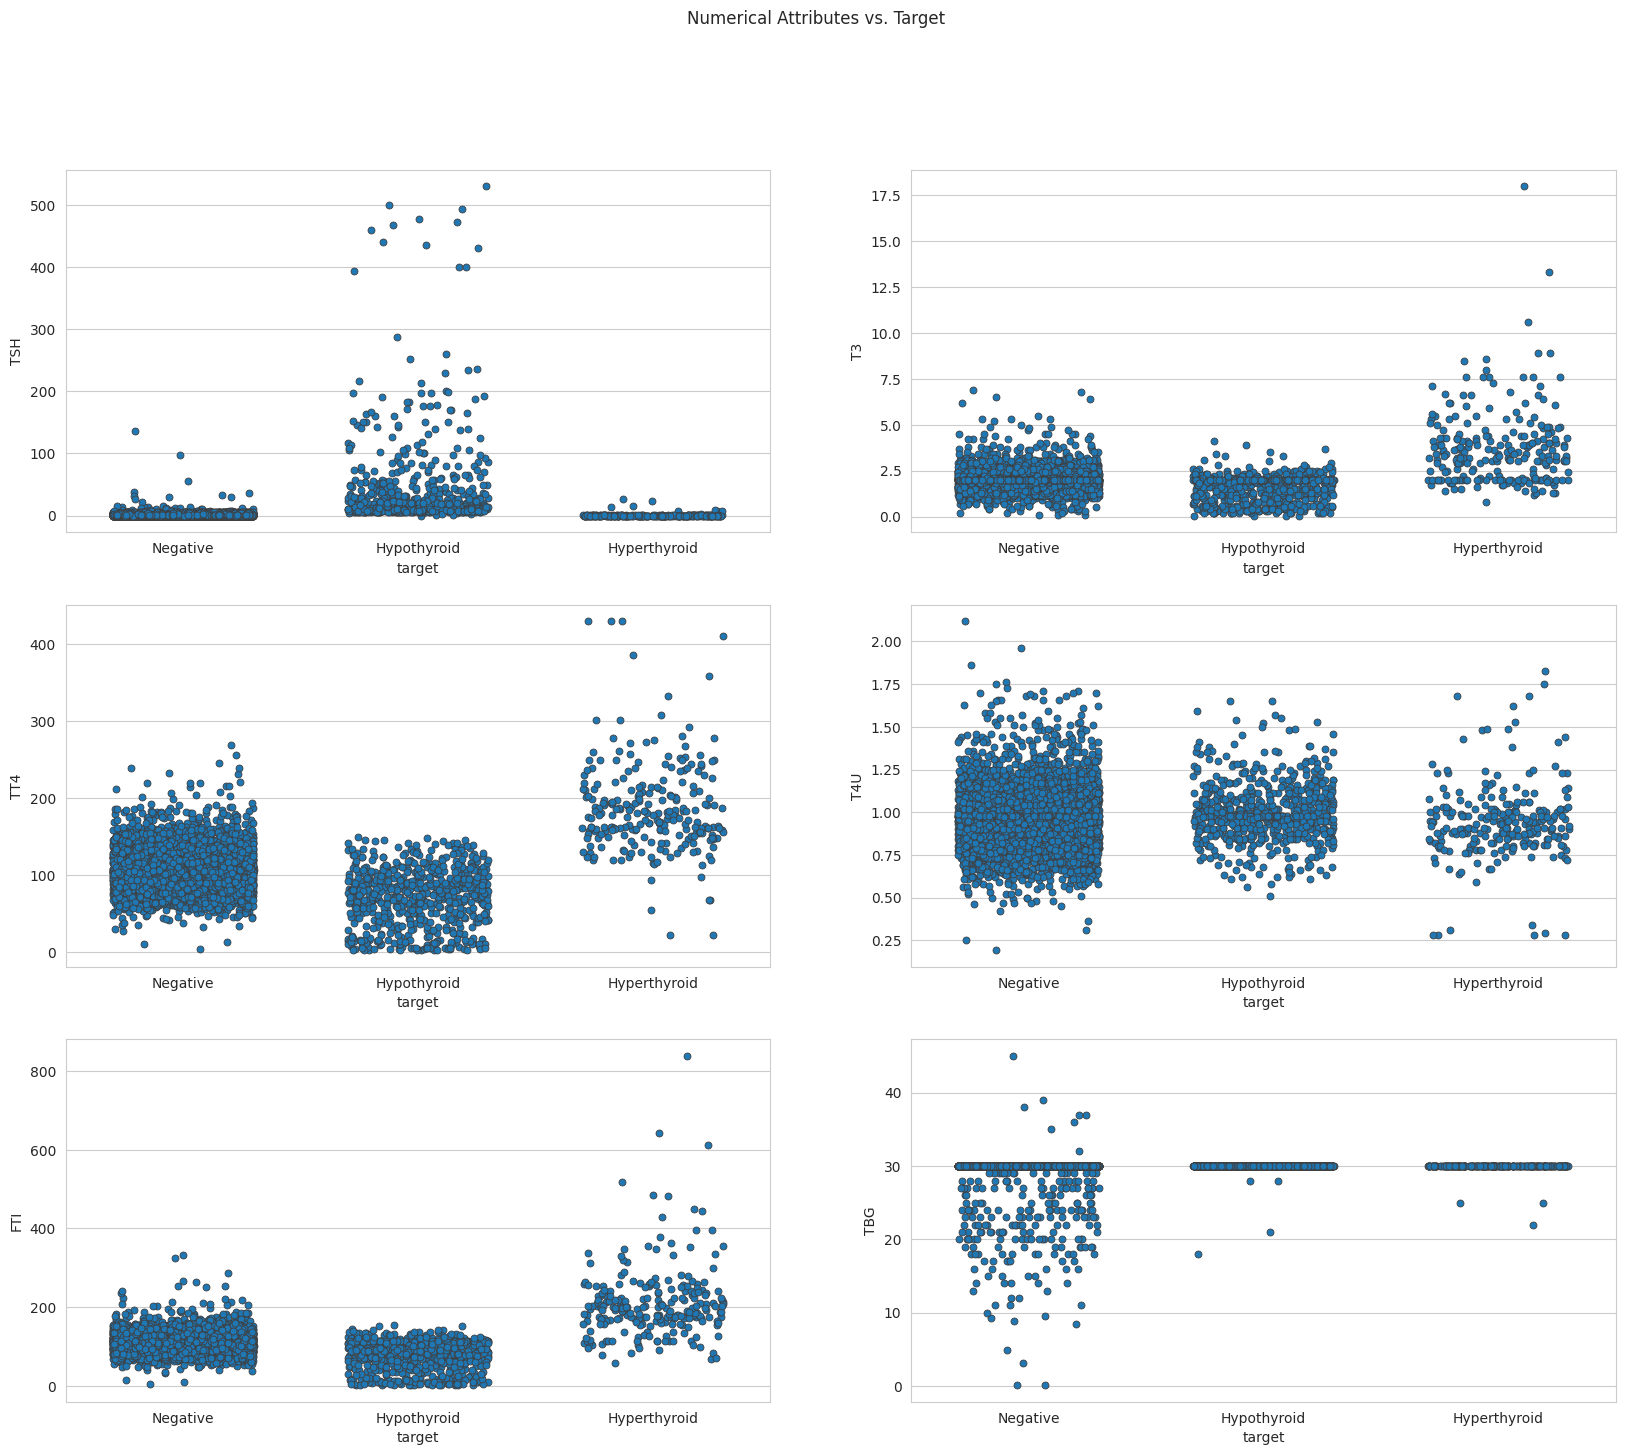

In [155]:
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=df.target, y=df.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=df.target, y=df.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=df.target, y=df.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=df.target, y=df.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=df.target, y=df.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=df.target, y=df.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

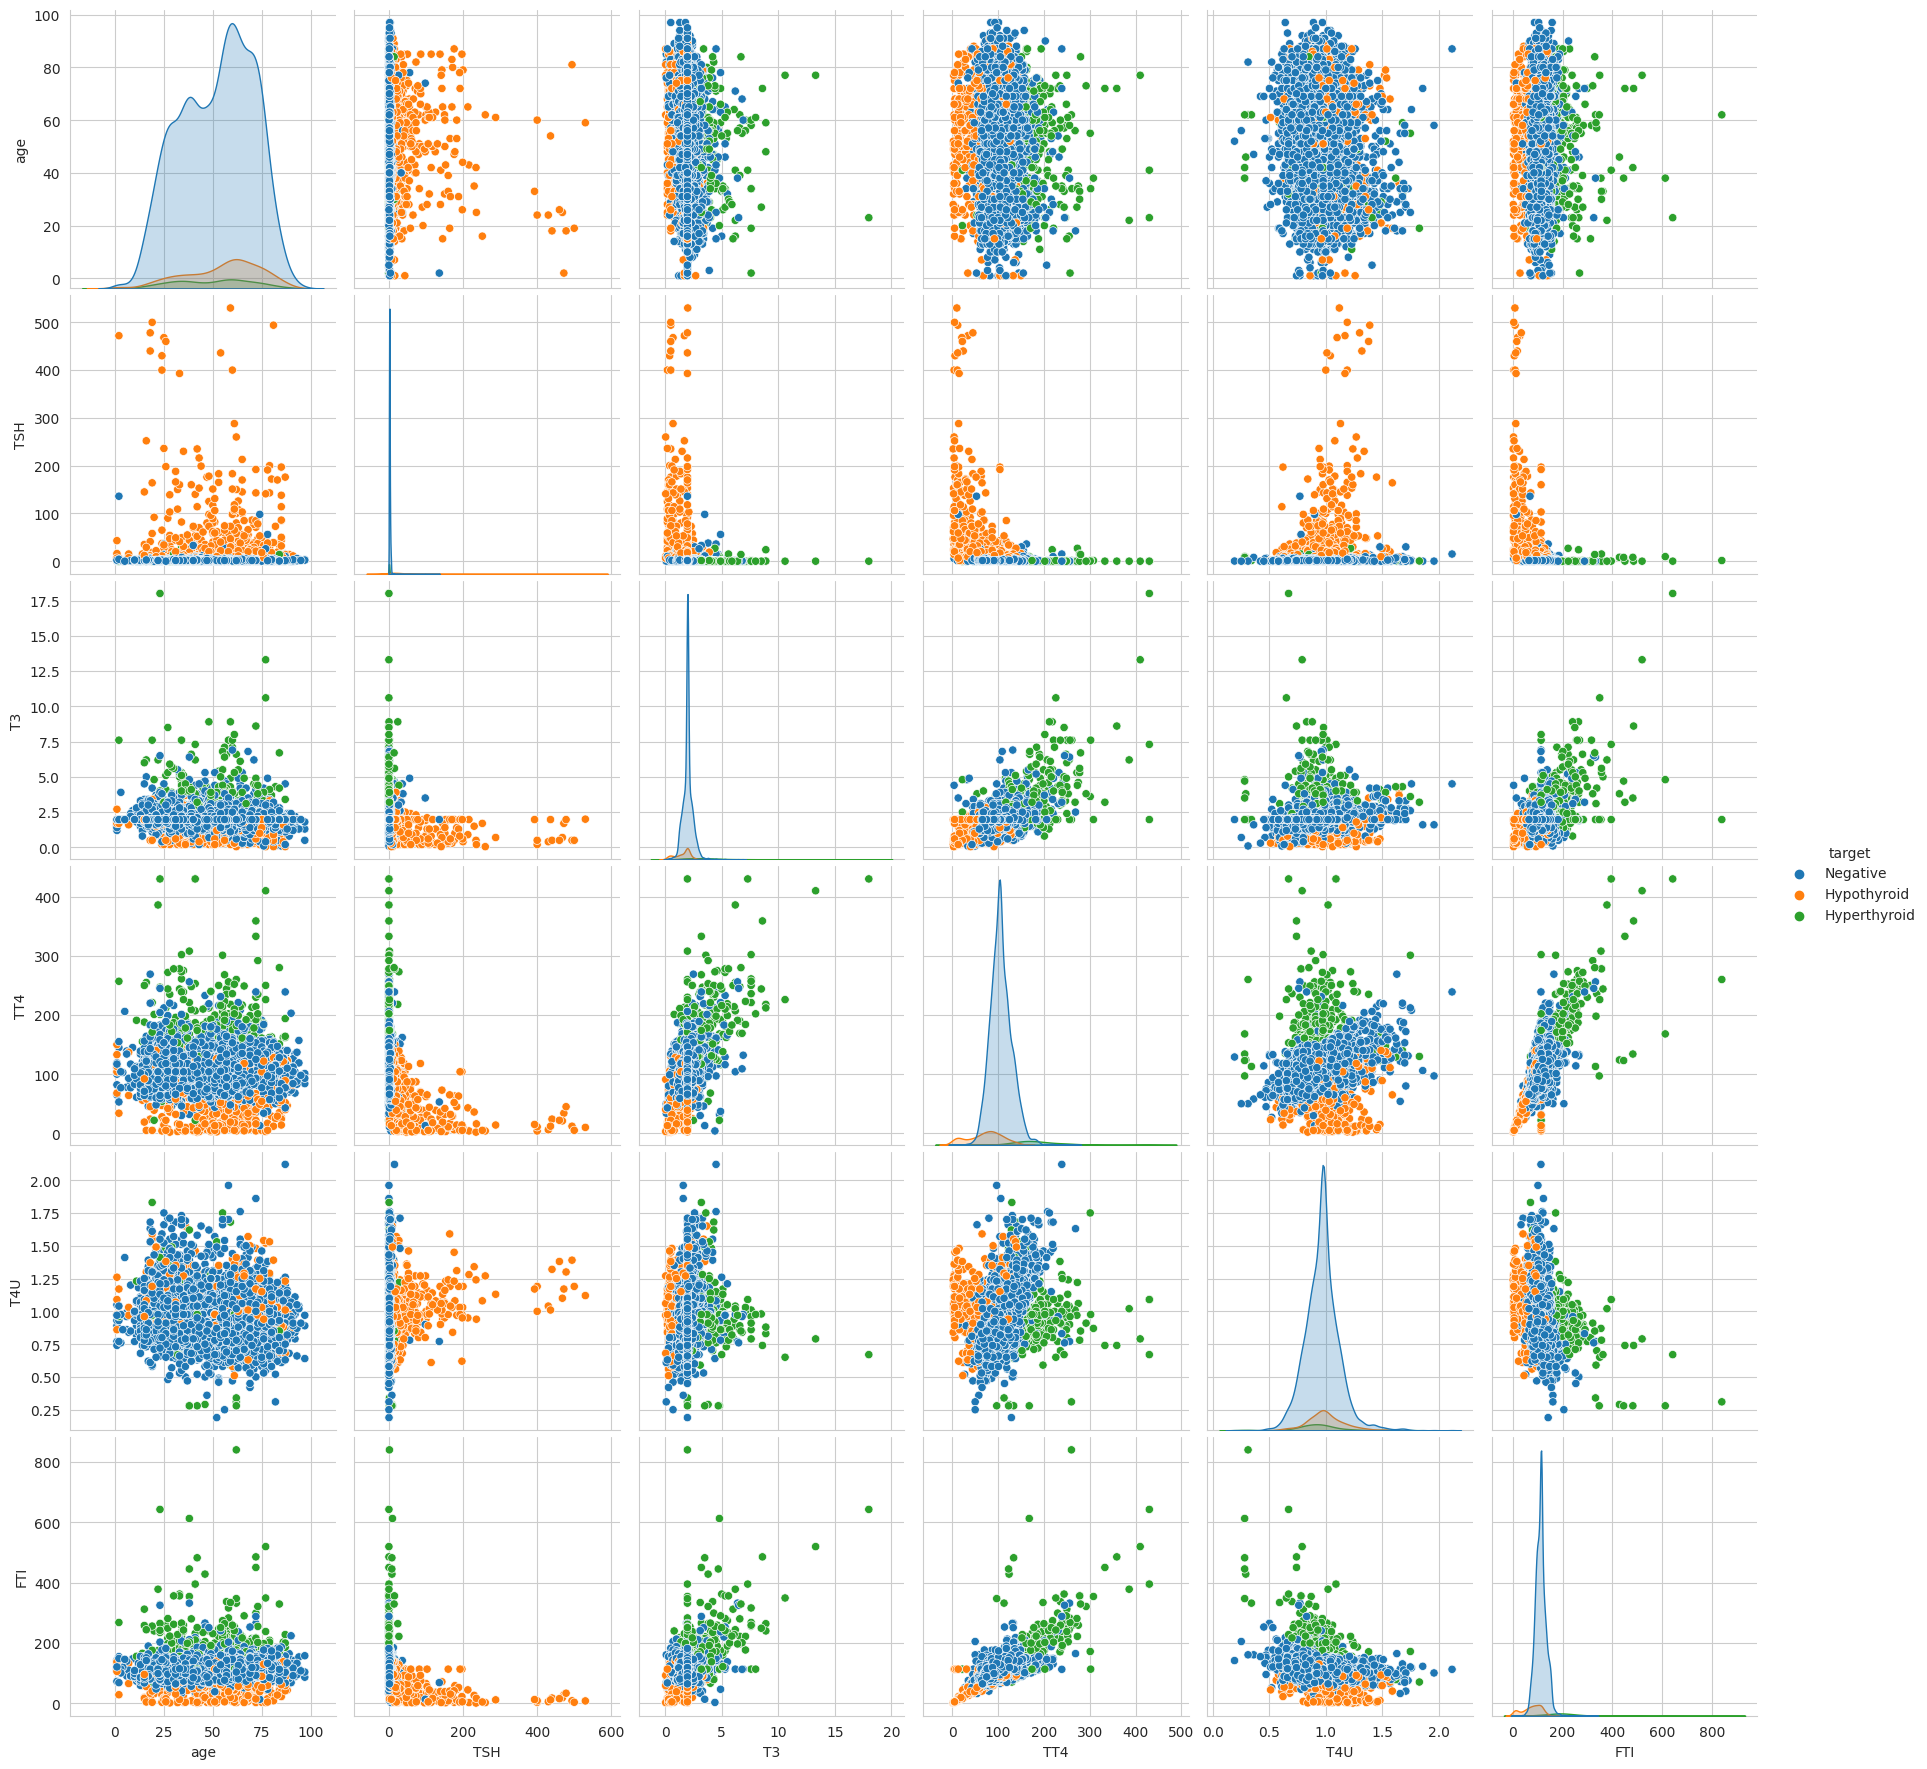

In [156]:
numerical = df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numerical, hue='target', height=3);
plt.show()

In [157]:
import plotly.express as px

fig = px.scatter_3d(df, x='T4U', y='T3', z='TSH',color='target', color_discrete_map={'Hypothyroid': '#4b9546', 'Hyperthyroid': '#F65366', 'Negative': '#3498db'}, height=800)
fig.show()